In [87]:
import torch
import numpy as np

def l_A(x):
    l1 = x[0] ** 2
    l2 = x[1] ** 2
    l3 = x[2] ** 2
    l4 = x[3] ** 2
    return l1 + 0.1*l2 + 0.01*l3 + 0.001*l4, [l1.item(),l2.item(),l3.item(),l4.item()]

def l_B(x):
    l1 = ((x[0] + x[1] + x[2] + x[3])/2) ** 2
    l2 = ((x[0] + x[1] - x[2] - x[3])/2) ** 2
    l3 = ((x[0] - x[1] + x[2] - x[3])/2) ** 2
    l4 = ((x[0] - x[1] - x[2] + x[3])/2) ** 2
    return l1 + 0.1*l2 + 0.01*l3 + 0.001*l4, [l1.item(),l2.item(),l3.item(),l4.item()]



#x = torch.nn.Parameter(torch.tensor([1., 1., 1., 1.]))
x = torch.nn.Parameter(torch.tensor([1., 1., 1., -1.]))


lr = 3e-4
steps = 10000

#optimizer = torch.optim.SGD([x], lr=lr)
optimizer = torch.optim.Adam([x], lr=lr, betas=(0.,0.))
#optimizer = torch.optim.Adam([x], lr=lr, betas=(0.9,0.999))

losses = []

for i in range(steps):
    
    if i % 2000 == 0:
        print(i)
    
    optimizer.zero_grad()
    
    loss, ls = l_B(x)
    loss.backward()
    
    optimizer.step()
    
    losses.append(ls)
    
losses = np.array(losses)

0
2000
4000
6000
8000


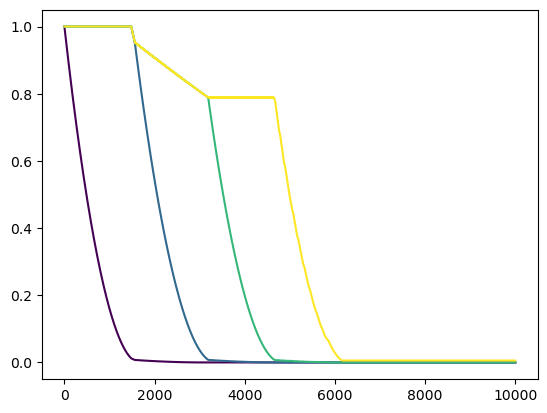

In [88]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis') 

for i in range(4):
    plt.plot(losses[:,i], color=cmap(i/3))

In [41]:
import copy
#signgd_B = copy.deepcopy(losses)
#sgd_B = copy.deepcopy(losses)
signgd_A = copy.deepcopy(losses)
#sgd_A = copy.deepcopy(losses)

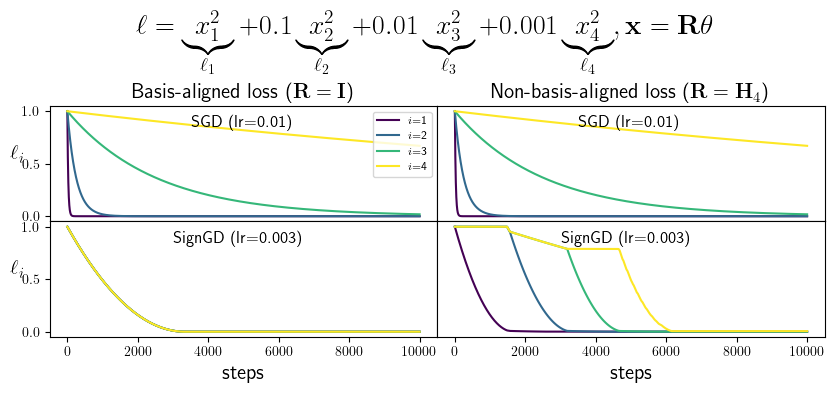

In [105]:
plt.figure(figsize=(10,3))

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

plt.subplot(2,2,1)
for i in range(4):
    plt.plot(sgd_A[:,i], color=cmap(i/3))
plt.xticks([])

plt.legend([r'$i$={}'.format(i) for i in np.arange(1,5)], fontsize=8, loc='upper right')

plt.ylabel(r'$\ell_i$', fontsize=15, rotation=0)
plt.title(r'Basis-aligned loss (${\bf R}={\bf I}$)', fontsize=15)
plt.text(3500,0.85,'SGD (lr=0.01)',fontsize=12)
    
plt.subplot(2,2,3)
for i in range(4):
    plt.plot(signgd_A[:,i], color=cmap(i/3))
plt.text(3000,0.85,'SignGD (lr=0.003)',fontsize=12)
    
plt.xlabel('steps', fontsize=15)
    
plt.ylabel(r'$\ell_i$', fontsize=15, rotation=0)
    
plt.subplot(2,2,2)
for i in range(4):
    plt.plot(sgd_B[:,i], color=cmap(i/3))
plt.xticks([])
plt.yticks([])
plt.text(3500,0.85,'SGD (lr=0.01)',fontsize=12)

plt.title(r'Non-basis-aligned loss (${\bf R}={\bf H}_4$)', fontsize=15)
    
plt.subplot(2,2,4)
for i in range(4):
    plt.plot(signgd_B[:,i], color=cmap(i/3))
plt.yticks([])

plt.xlabel('steps', fontsize=15)
plt.text(3000,0.85,'SignGD (lr=0.003)',fontsize=12)
    
plt.subplots_adjust(wspace=0.0, hspace=0.) 
plt.suptitle(r'$\ell = \underbrace{x_1^2}_{\ell_1} + 0.1 \underbrace{x_2^2}_{\ell_2} + 0.01 \underbrace{x_3^2}_{\ell_3} + 0.001 \underbrace{x_4^2}_{\ell_4}, {\bf x}={\bf R}{\bf \theta}$', y=1.2, fontsize=20)
plt.savefig('./plot/quadratic_loss_optimization.pdf', bbox_inches='tight')